# Report 1
- Fitting Incompressible Modified Bergstrom-Boyce to Figure 7 of goktepe+miehe05
- Seeing how increase in power terms increases the fit for Fig7d (Fastest rate, stiffest response, largest hysteresis)

### Figure 7

In [7]:
import sys
from pathlib import Path

current_dir = Path.cwd()
parent_dir = current_dir.parent.parent.parent
sys.path.append(str(parent_dir))

import pickle, numpy as np, matplotlib.pyplot as plt
from optimize import evaluate

In [9]:
# Getting all data

with open('Fig7b_2023-12-05_16-36-10.pkl', 'rb') as file:
    variables_1 = pickle.load(file)
with open('Fig7c_2023-12-07_18-00-23.pkl', 'rb') as file:
    variables_2 = pickle.load(file)
with open('Fig7d_2023-12-07_17-59-04.pkl', 'rb') as file:
    variables_3 = pickle.load(file)

# Mdata
data = np.loadtxt('visco1_2.dat')
P11 = data[:, 0]
stretch = data[:, 2]/100 + 1
t = data[:, 4]
true_strain = np.log(stretch)
true_stress = P11*stretch
mdata_7b = [(t, true_strain, true_stress)]
data = np.loadtxt('visco3_2.dat')
P11 = data[:, 0]
stretch = data[:, 2]/100 + 1
t = data[:, 4]
true_strain = np.log(stretch)
true_stress = P11*stretch
mdata_7c = [(t, true_strain, true_stress)]
data = np.loadtxt('visco2_2.dat')
P11 = data[:, 0]
stretch = data[:, 2]/100 + 1
t = data[:, 4]
true_strain = np.log(stretch)
true_stress = P11*stretch
mdata_7d = [(t, true_strain, true_stress)]

# Params and Loss History
params_hist_7b = variables_1[2]
loss_hist_7b = variables_1[3]
params_out_7b = params_hist_7b[np.argmin(loss_hist_7b)]
params_hist_7c = variables_2[2]
loss_hist_7c = variables_2[3]
params_out_7c = params_hist_7c[np.argmin(loss_hist_7c)]
params_hist_7d = variables_3[2]
loss_hist_7d = variables_3[3]
params_out_7d = params_hist_7d[np.argmin(loss_hist_7d)]

In [11]:
# Predictions
%%capture
mat = 'ubbmi'

pred_7b = evaluate(mdata_7b, params_out_7b, mat)
pred_7c = evaluate(mdata_7c, params_out_7c, mat)
pred_7d = evaluate(mdata_7d, params_out_7d, mat)



---Fig 7B--- (rate = 0.05/min)
      mu: 0.36951473821911046
    mu_v: 0.3767559646422238
       N: 9.87126142192348
     N_v: 8.041226573149046
 tau_hat: 11.938997079335698
      a1: 0.21434595849116606
      a2: -11.145666584230975
      a3: -17.555425068238243
      a4: -2.2449144081035355
    Loss: 0.0013859390605014629


---Fig 7C--- (rate = 0.5/min)
      mu: 0.39040130412360086
    mu_v: 0.28835442185203225
       N: 8.804981748573587
     N_v: 5.029107260403647
 tau_hat: 14.245177423771443
      a1: 1.0879300522861979
      a2: -8.158689368216317
      a3: -13.522147314949246
      a4: -1.1324690248622062
    Loss: 0.0023791507997506975


---Fig 7D--- (rate = 5/min)
      mu: 0.4012313248701893
    mu_v: 0.27127668563081986
       N: 9.022722509454931
     N_v: 6.536765543898636
 tau_hat: 10.49364757591366
      a1: 2.298531016324122
      a2: 2.838217364923821
      a3: 2.2810034567674218
      a4: 2.482811116846335
    Loss: 0.005461543283879723


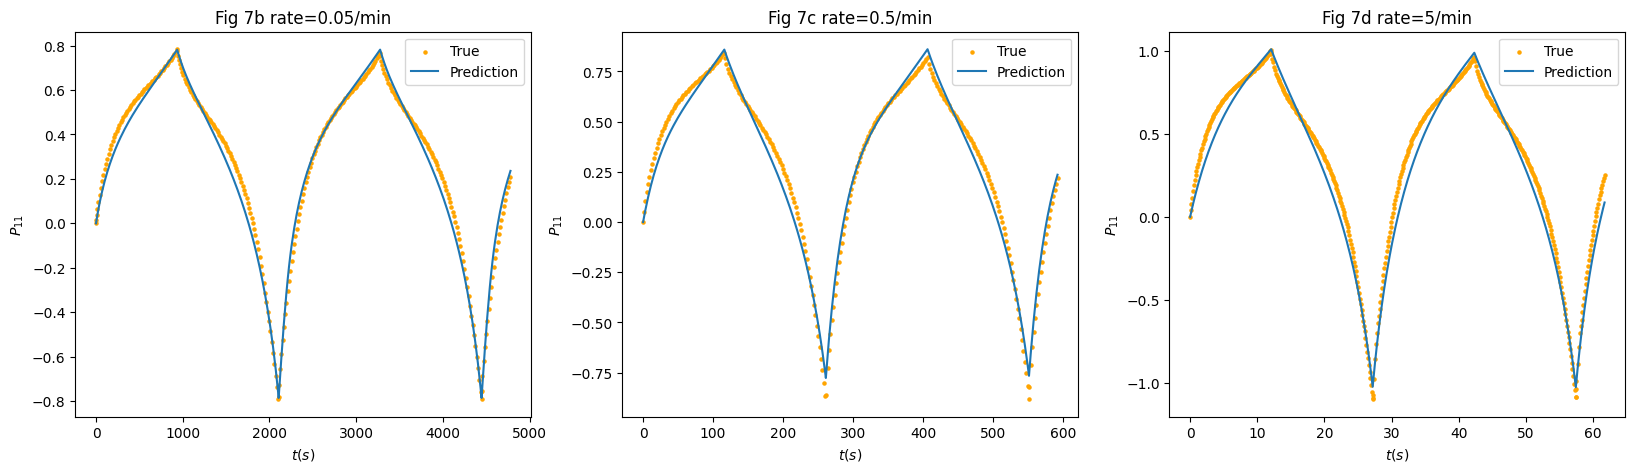

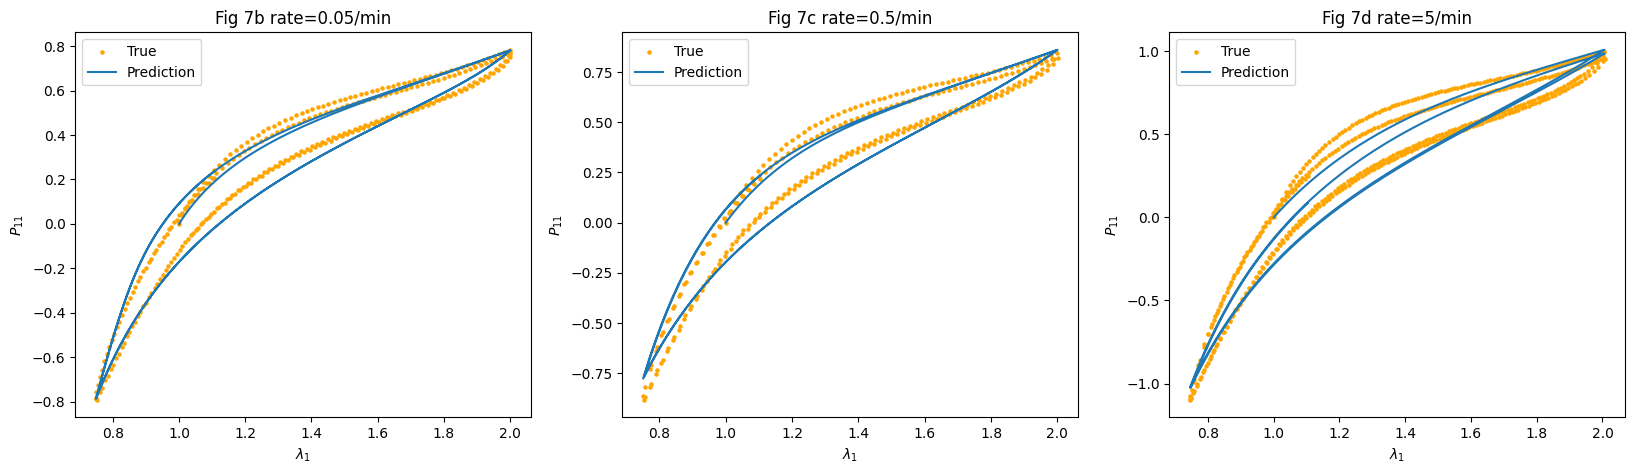

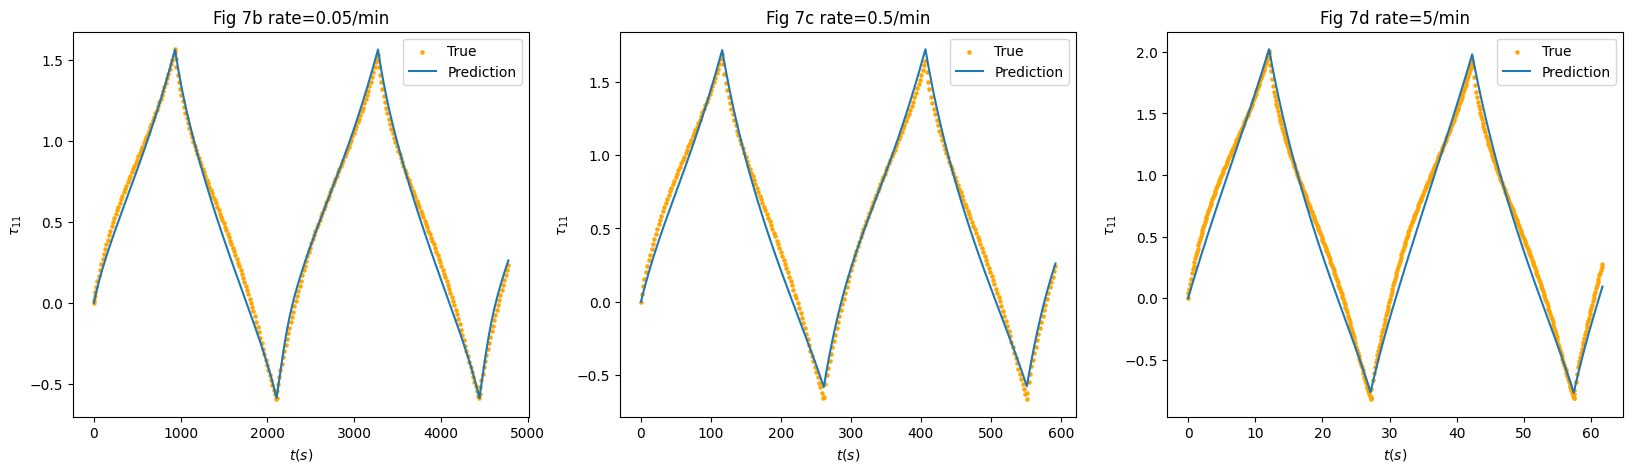

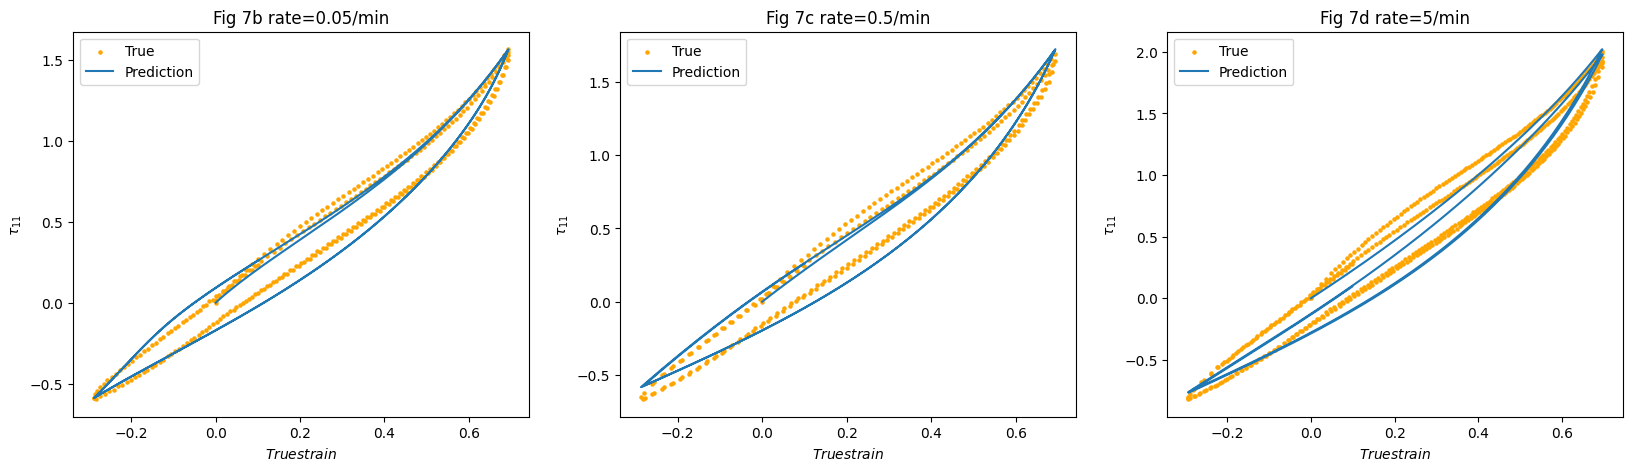

In [69]:
# Print the results

# Parameters and Loss
coef = 4
params_names = ['mu', 'mu_v', 'N', 'N_v', 'tau_hat'] + [f'a{j}'.format(j=j) for j in range(1, coef+1)]
print("\n\n---Fig 7B--- (rate = 0.05/min)")
for i, name in enumerate(params_names):
    print(f'{name:>8}: {params_out_7b[i]}')
print(f'    Loss: {min(loss_hist_7b)}')

print("\n\n---Fig 7C--- (rate = 0.5/min)")
for i, name in enumerate(params_names):
    print(f'{name:>8}: {params_out_7c[i]}')
print(f'    Loss: {min(loss_hist_7c)}')

print("\n\n---Fig 7D--- (rate = 5/min)")
for i, name in enumerate(params_names):
    print(f'{name:>8}: {params_out_7d[i]}')
print(f'    Loss: {min(loss_hist_7d)}')

titles = ['Fig 7b rate=0.05/min', 'Fig 7c rate=0.5/min', 'Fig 7d rate=5/min']
ti = [mdata_7b[0][0], mdata_7c[0][0], mdata_7d[0][0]]
tstri = [mdata_7b[0][1], mdata_7c[0][1], mdata_7d[0][1]]
tsti = [mdata_7b[0][2], mdata_7c[0][2], mdata_7d[0][2]]
tspi = [pred_7b[0][2], pred_7c[0][2], pred_7d[0][2]]

figsize = (20, 5)

# Plots (P11 vs Time)
plt.figure(figsize=figsize)
for i, (t, tstr, tst, tsp, title) in enumerate(zip(ti, tstri, tsti, tspi, titles)):
    plt.subplot(1, 3, i+1)
    plt.scatter(t, tst/np.exp(tstr), label='True', s=5, c='orange')
    plt.plot(t, tsp/np.exp(tstr), label='Prediction')
    plt.title(title)
    plt.xlabel(r'$t (s)$')
    plt.ylabel(r'$P_{11}$')
    plt.legend()

# Plots (P11 vs Stretch)
plt.figure(figsize=figsize)
for i, (t, tstr, tst, tsp, title) in enumerate(zip(ti, tstri, tsti, tspi, titles)):
    plt.subplot(1, 3, i+1)
    plt.scatter(np.exp(tstr), tst/np.exp(tstr), label='True', s=5, c='orange')
    plt.plot(np.exp(tstr), tsp/np.exp(tstr), label='Prediction')
    plt.title(title)
    plt.xlabel(r'$\lambda_1$')
    plt.ylabel(r'$P_{11}$')
    plt.legend()

# Plots (True stress vs Time)
plt.figure(figsize=figsize)
for i, (t, tstr, tst, tsp, title) in enumerate(zip(ti, tstri, tsti, tspi, titles)):
    plt.subplot(1, 3, i+1)
    plt.scatter(t, tst, label='True', s=5, c='orange')
    plt.plot(t, tsp, label='Prediction')
    plt.title(title)
    plt.xlabel(r'$t (s)$')
    plt.ylabel(r'$\tau_{11}$')
    plt.legend()

# Plots (True stress vs True Strain)
plt.figure(figsize=figsize)
for i, (t, tstr, tst, tsp, title) in enumerate(zip(ti, tstri, tsti, tspi, titles)):
    plt.subplot(1, 3, i+1)
    plt.scatter(tstr, tst, label='True', s=5, c='orange')
    plt.plot(tstr, tsp, label='Prediction')
    plt.title(title)
    plt.xlabel(r'$True strain$')
    plt.ylabel(r'$\tau_{11}$')
    plt.legend()

Text(0.5, 1.0, 'Fig 7d rate=5/min')

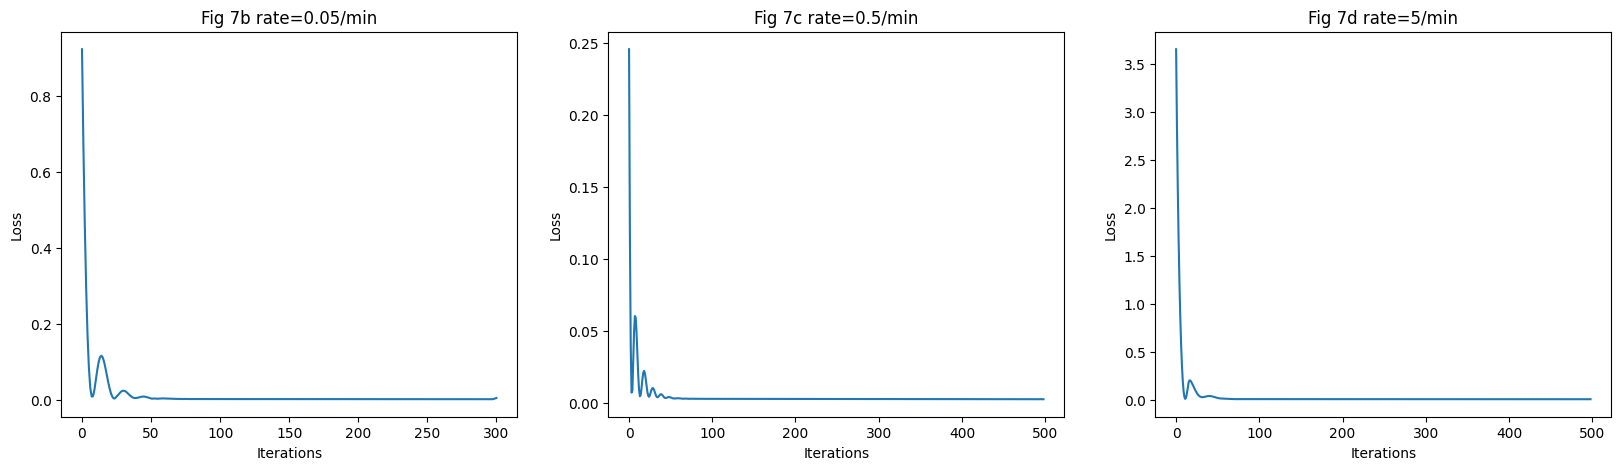

In [70]:
# Plots (Loss History)
plt.figure(figsize=figsize)
plt.subplot(1, 3, 1)
plt.plot(loss_hist_7b[:-1])
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title(titles[0])
plt.subplot(1, 3, 2)
plt.plot(loss_hist_7c[:-1])
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title(titles[1])
plt.subplot(1, 3, 3)
plt.plot(loss_hist_7d[:-1])
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title(titles[2])

### Increasing power terms (Fig 7d)

In [56]:
with open('IncrPower_2023-12-07_18-54-37.pkl', 'rb') as file:
    variables_4 = pickle.load(file)

In [80]:
%%capture

# ALl predictions
mat = 'ubbmi'
tsp = []
losses = []
params_out = []
for i in range(9):
    params_out.append(variables_4[1][i][0])
    losses.append(min(variables_4[1][i][2])) 
    tsp.append(evaluate(mdata_7d, params_out[-1], mat)[0][2])

In [83]:
# Parameters
for j in range(9):
    coef = j+1
    params_names = ['mu', 'mu_v', 'N', 'N_v', 'tau_hat'] + [f'a{j}'.format(j=j) for j in range(1, coef+1)]
    print(f'\n\n---# of Terms = {coef}---')
    for i, name in enumerate(params_names):
        print(f'{name:>8}: {params_out[j][i]}')
    print(f'    Loss: {losses[j]}')



---# of Terms = 1---
      mu: 0.43488670627016784
    mu_v: 0.35044366865040855
       N: 8.102913221554784
     N_v: 6.246231896469403
 tau_hat: 6.715036288996995
      a1: 3.2712613352669773
    Loss: 0.003527570363990457


---# of Terms = 2---
      mu: 0.4294527154472033
    mu_v: 0.322231916359069
       N: 10.253091704905016
     N_v: 9.403813018801896
 tau_hat: 8.287288672985259
      a1: 2.822838276995473
      a2: 2.427335393351324
    Loss: 0.003943131121005717


---# of Terms = 3---
      mu: 0.4438104254774596
    mu_v: 0.34634395540452845
       N: 9.924724469589956
     N_v: 6.80998565401542
 tau_hat: 9.039313959184055
      a1: 4.107566510039734
      a2: 2.8407611284256435
      a3: 2.3409102110769
    Loss: 0.0033787609075975745


---# of Terms = 4---
      mu: 0.42573440546147107
    mu_v: 0.32957642157964817
       N: 7.889293798515626
     N_v: 5.906951256967526
 tau_hat: 7.341791531518927
      a1: 3.0797964805918765
      a2: 2.7546359404702585
      a3: 2.4964

Text(0, 0.5, 'Loss')

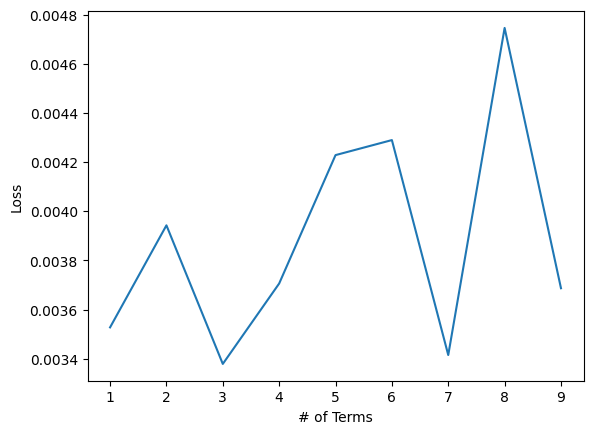

In [84]:
# Losses vs Terms
plt.figure()
plt.plot(range(1, 10), losses)
plt.xlabel("# of Terms")
plt.ylabel("Loss")

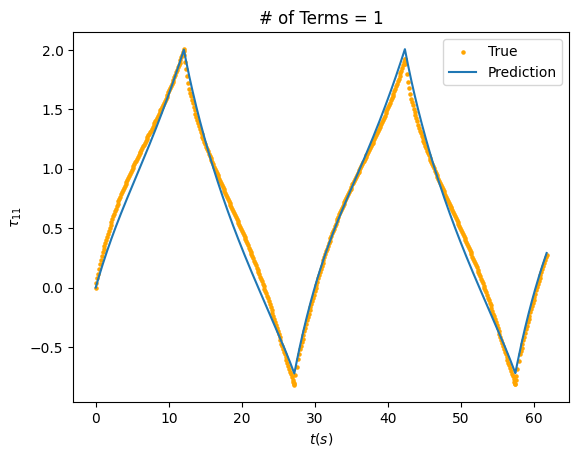

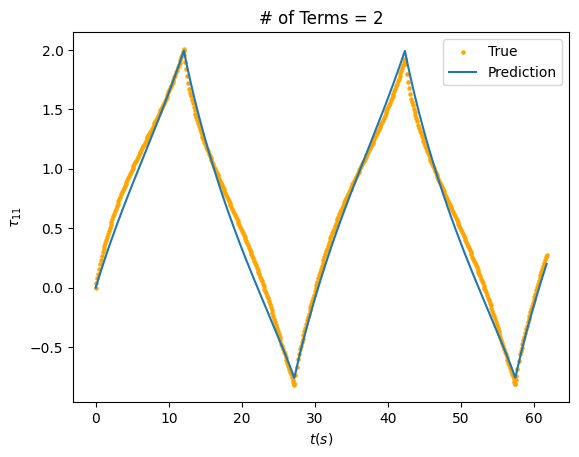

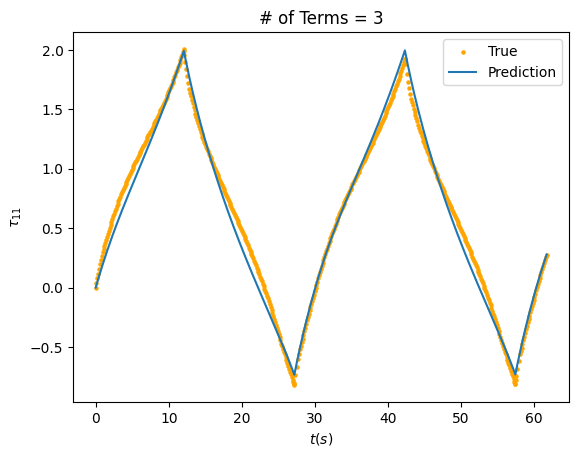

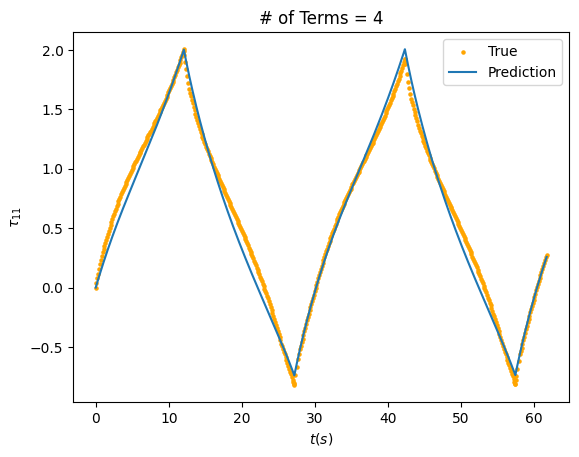

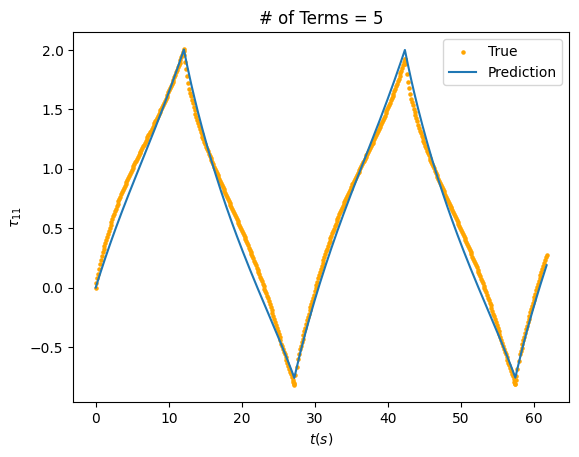

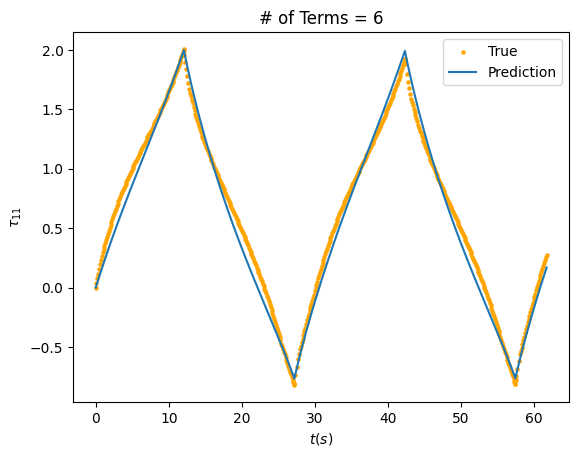

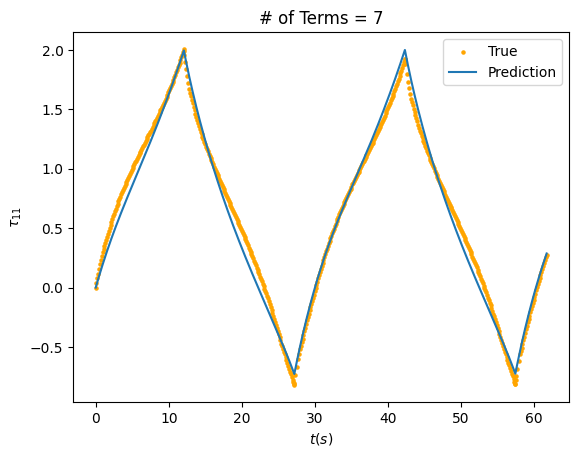

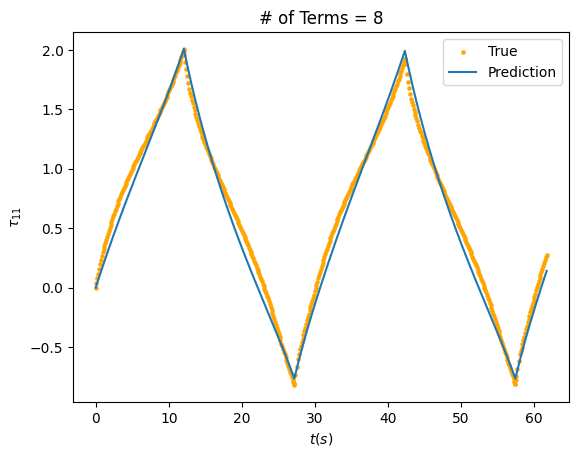

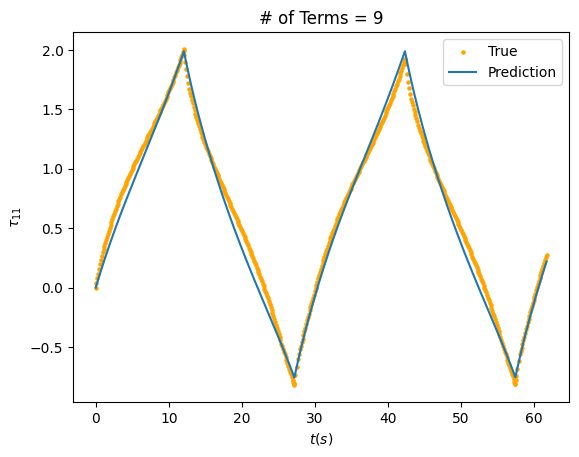

In [86]:
# True Stress vs time
for i in range(9):
    plt.figure()
    plt.scatter(mdata_7d[0][0], mdata_7d[0][2], label='True', s=5, c='orange')
    plt.plot(mdata_7d[0][0], tsp[i], label='Prediction')
    plt.title(f'# of Terms = {i+1}')
    plt.xlabel(r'$t (s)$')
    plt.ylabel(r'$\tau_{11}$')
    plt.legend()